# LiReg

In [1]:
import numpy as np
import matplotlib.pyplot as pl

In [2]:
X = np.array([1,-2,1,-1,1,1,1,2,1,7]).reshape(5,2)
y = np.array([0,1,2,4,6]).reshape(-1,1)
print(f'X\n{X}\ny\n{y}')
#Kontrolle: Verifizieren, dass erste Column in X aus Einsen besteht

X
[[ 1 -2]
 [ 1 -1]
 [ 1  1]
 [ 1  2]
 [ 1  7]]
y
[[0]
 [1]
 [2]
 [4]
 [6]]


In [3]:
X.T@X

array([[ 5,  7],
       [ 7, 59]])

In [4]:
#Regressionskoeffizienten bhat
bhat = np.linalg.inv(X.T@X)@X.T@y
print(f'bhat={bhat}')

bhat=[[1.66666667]
 [0.66666667]]


In [5]:
#P, Q, M
P = X@np.linalg.inv(X.T@X)@X.T
Q = np.identity(len(X)) - P
#Q = I - P, wobei Shape von I die Anzahl an Datenpunkten ist
M = np.identity(len(X)) - np.full((len(X),len(X)),1)*(1/len(X))
#M = I - 1/m(Matrix full 1 in shape m)
print(f'Projektionsmatrix P\n{P}\nResidualmatrix Q\n{Q}\nZentrierende Matrix M\n{M}')

Projektionsmatrix P
[[ 0.43495935  0.36585366  0.22764228  0.15853659 -0.18699187]
 [ 0.36585366  0.31707317  0.2195122   0.17073171 -0.07317073]
 [ 0.22764228  0.2195122   0.20325203  0.19512195  0.15447154]
 [ 0.15853659  0.17073171  0.19512195  0.20731707  0.26829268]
 [-0.18699187 -0.07317073  0.15447154  0.26829268  0.83739837]]
Residualmatrix Q
[[ 0.56504065 -0.36585366 -0.22764228 -0.15853659  0.18699187]
 [-0.36585366  0.68292683 -0.2195122  -0.17073171  0.07317073]
 [-0.22764228 -0.2195122   0.79674797 -0.19512195 -0.15447154]
 [-0.15853659 -0.17073171 -0.19512195  0.79268293 -0.26829268]
 [ 0.18699187  0.07317073 -0.15447154 -0.26829268  0.16260163]]
Zentrierende Matrix M
[[ 0.8 -0.2 -0.2 -0.2 -0.2]
 [-0.2  0.8 -0.2 -0.2 -0.2]
 [-0.2 -0.2  0.8 -0.2 -0.2]
 [-0.2 -0.2 -0.2  0.8 -0.2]
 [-0.2 -0.2 -0.2 -0.2  0.8]]


In [6]:
#Präsentation: yhat = Py = X@bhat ; e = y - yhat = Qy

yhat = P@y
#yhat = X@bhat

e = y - yhat
#e = Q@y
print(f'yhat\n{yhat}\ne\n{e}')

yhat
[[0.33333333]
 [1.        ]
 [2.33333333]
 [3.        ]
 [6.33333333]]
e
[[-0.33333333]
 [ 0.        ]
 [-0.33333333]
 [ 1.        ]
 [-0.33333333]]


In [7]:
#Bestimmtheitsmass R^2
#R^2 = 1 - SQR/SQT
#SQR = y^T@Q@y
#SQT = y^T@M@y

SQR = y.T@Q@y
SQT = y.T@M@y

Rsquare = 1 - (SQR/SQT)
print(f'Rsquare\n{Rsquare}\n')

Rsquare
[[0.94252874]]



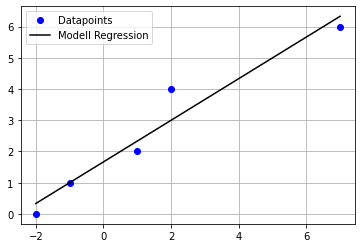

In [8]:
#Approximation mit Regessionskoeffizienten
def model_function(x):
    return bhat[0] + x*bhat[1]

model_range = np.linspace(min(X[:,1]),max(X[:,1]),num=len(X[:,1]))

pl.plot(X[:,1],y.T[0],'ro',color='blue',label='Datapoints')
pl.plot(model_range,model_function(model_range),'',color='black',label='Modell Regression')
pl.grid()
pl.legend()